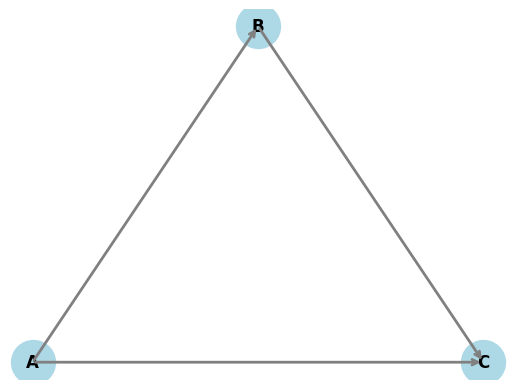

In [16]:
import rustworkx as rx
import matplotlib.pyplot as plt

# Create a directed graph
graph = rx.PyDiGraph()

# Add nodes
nodes = [graph.add_node(label) for label in ["A", "B", "C"]]

# Add edges
graph.add_edges_from_no_data([(nodes[0], nodes[1]), (nodes[1], nodes[2]), (nodes[0], nodes[2])])

# Manually draw the graph using matplotlib
pos = {0: (0, 1), 1: (1, 2), 2: (2, 1)}  # Define positions for nodes
labels = {0: "A", 1: "B", 2: "C"}

fig, ax = plt.subplots()

# Draw nodes
for node, (x, y) in pos.items():
    ax.scatter(x, y, s=1000, color='lightblue')
    ax.text(x, y, labels[node], fontsize=12, ha='center', va='center', weight='bold')

# Draw edges
for edge in graph.edge_list():
    start, end = edge[:2]
    ax.annotate("", xy=pos[end], xytext=pos[start],
                arrowprops=dict(arrowstyle="->", lw=2, color='gray'))

ax.axis('off')
plt.show()

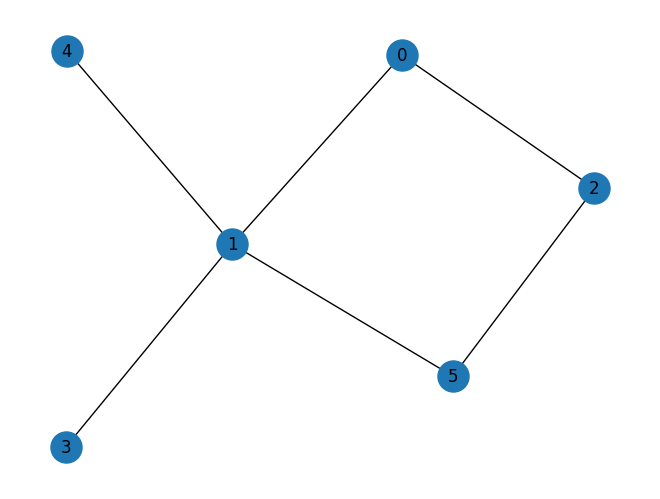

In [22]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

n = 6

graph = rx.PyGraph()
graph.add_nodes_from(range(n))
edge_list = [(0, 1, 1.0), (0, 2, 1.0), (1, 3, 1.0), (1, 4, 1.0), (2, 5, 1.0), (1, 5, 1.0)]
graph.add_edges_from(edge_list)
draw_graph(graph, node_size=500, with_labels=True)

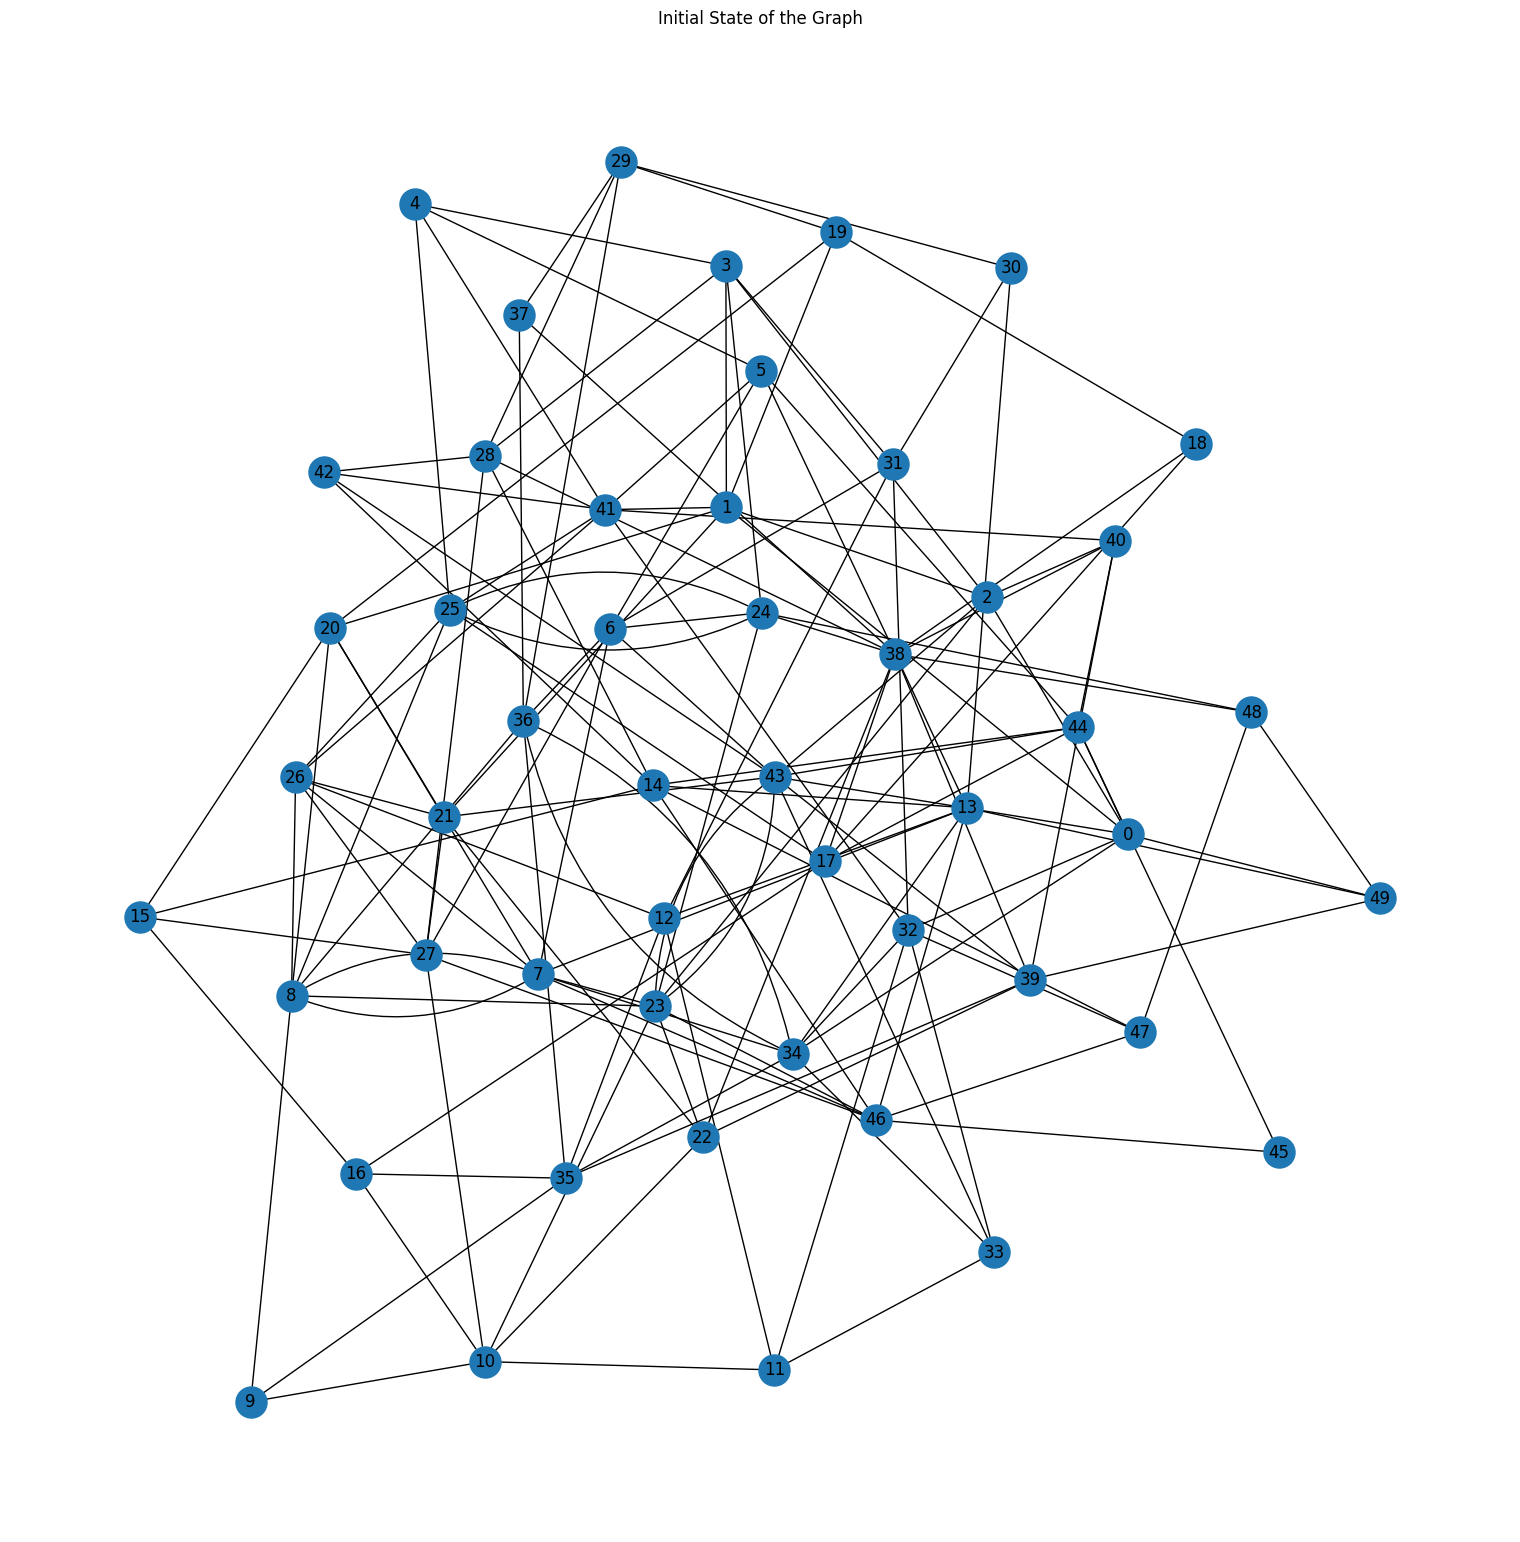

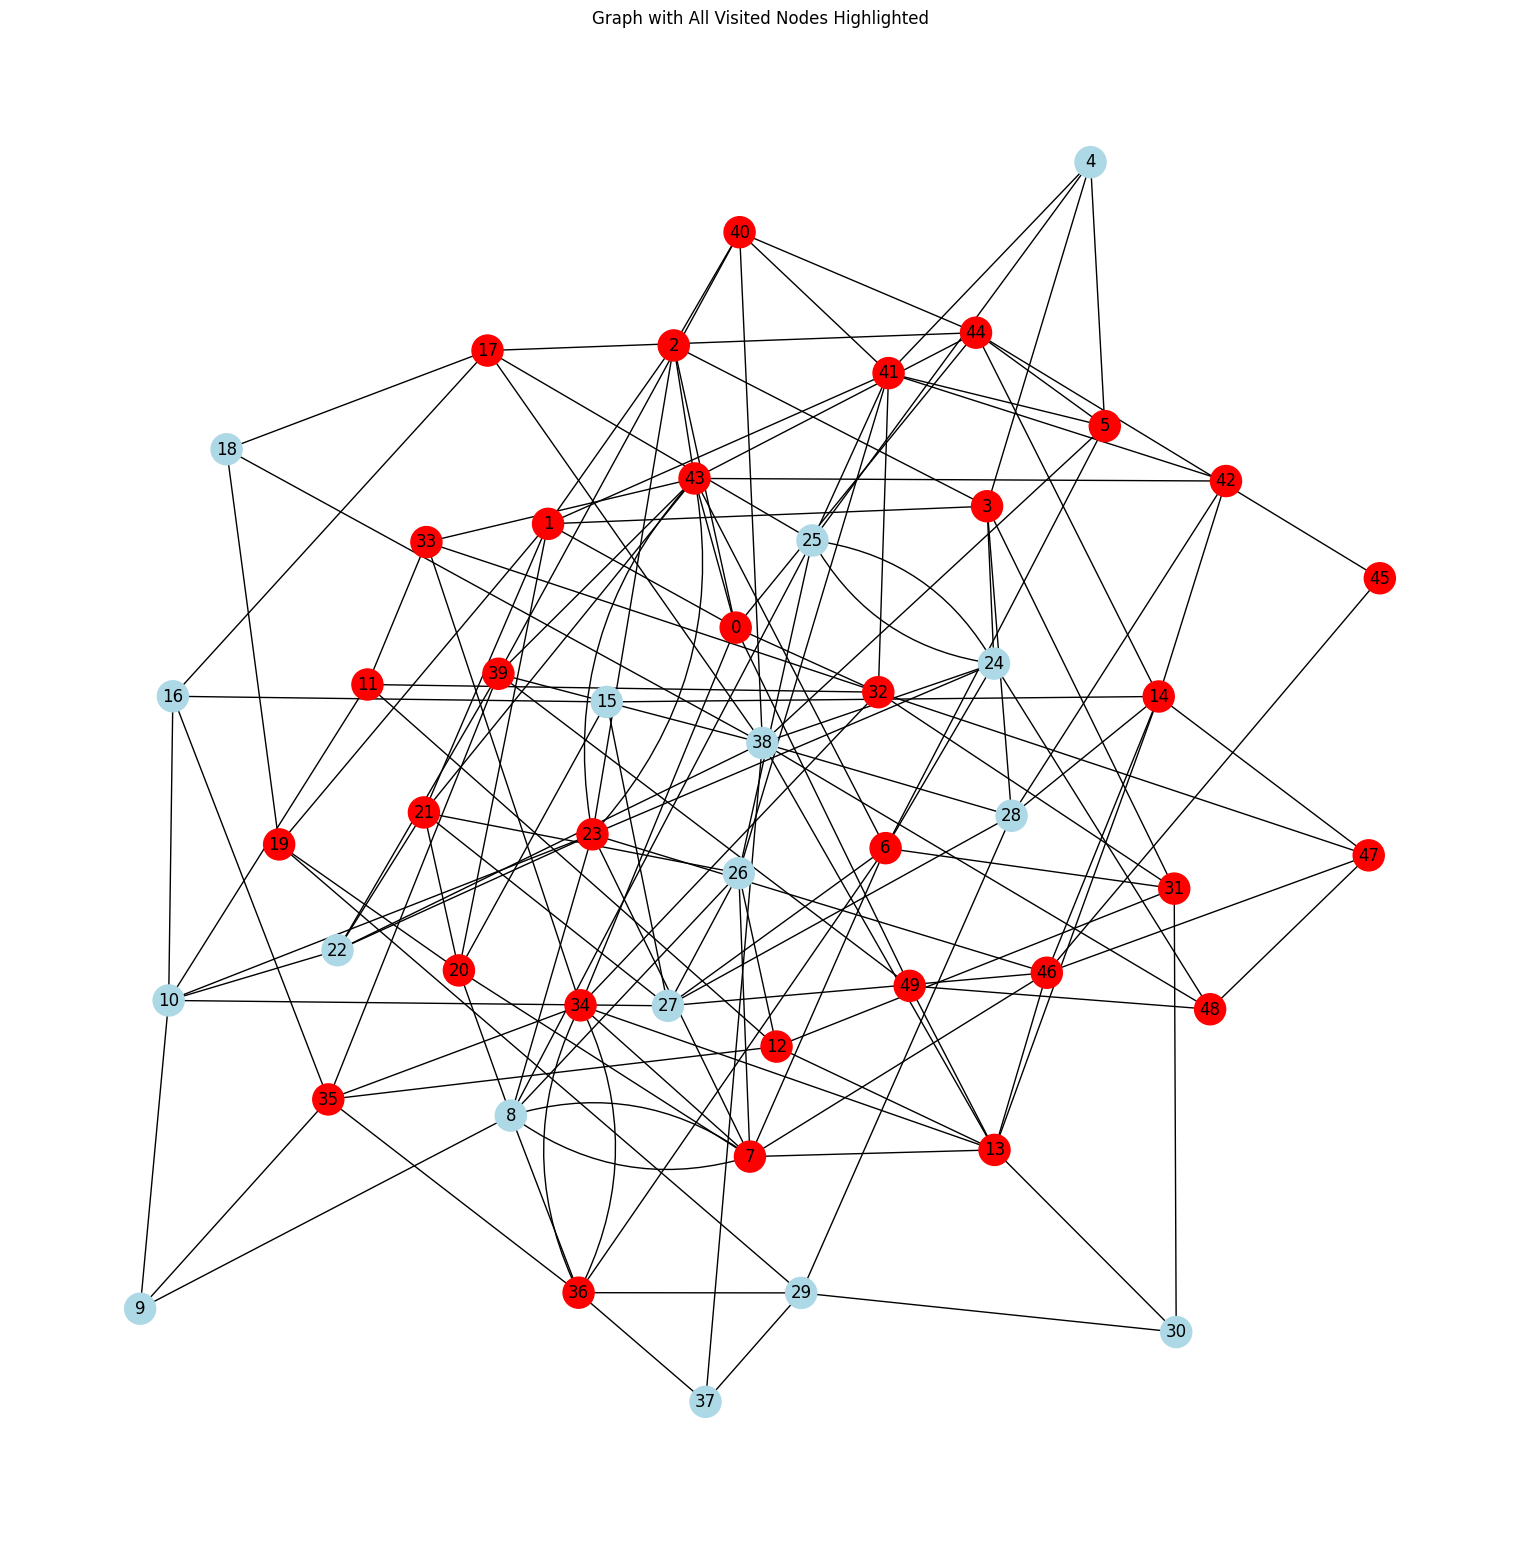

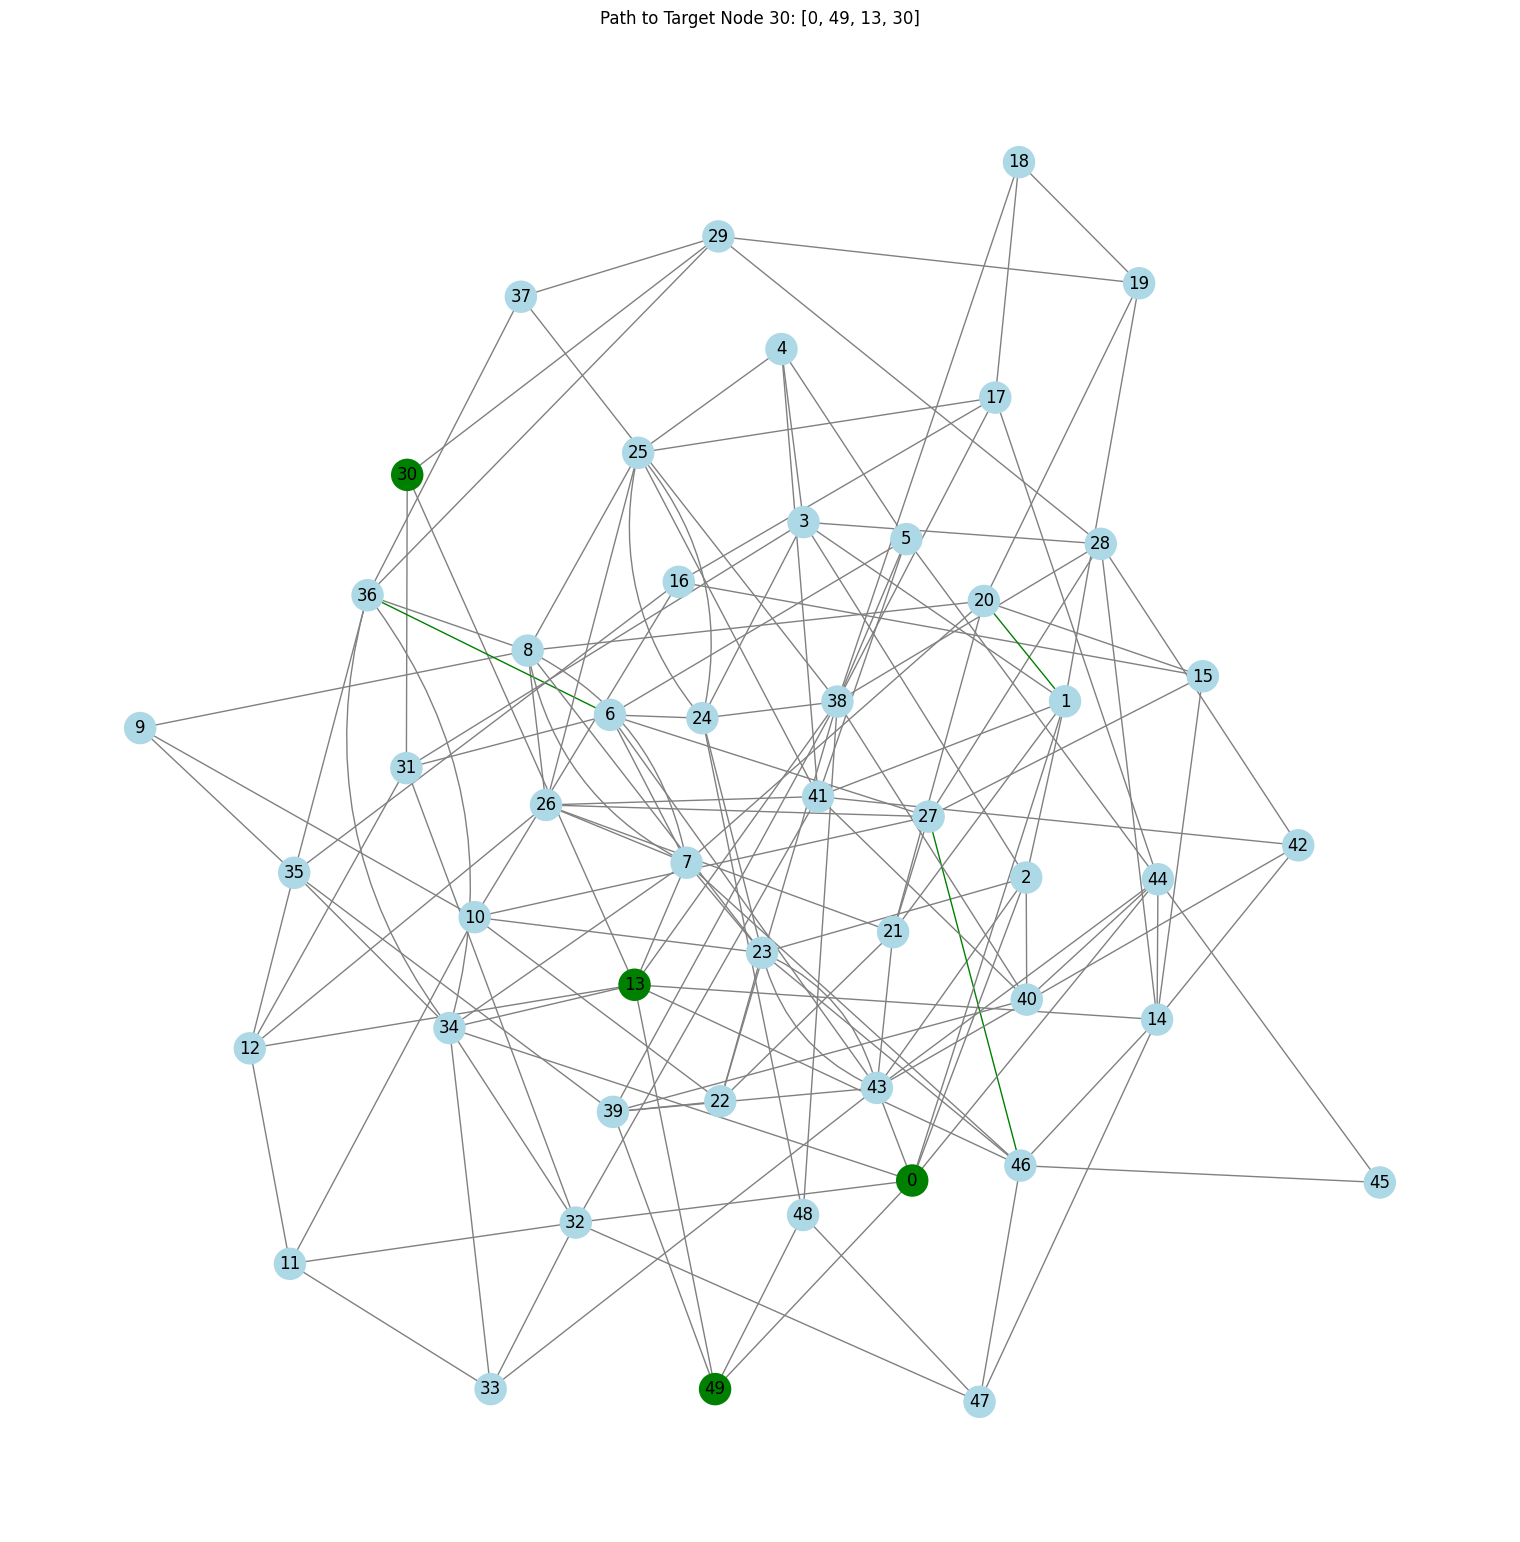

In [39]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
import matplotlib.pyplot as plt

# Number of nodes
n = 50

# Create an undirected graph
graph = rx.PyGraph()
graph.add_nodes_from(range(n))

# Generate a spanning set of edges to ensure all nodes are connected
spanning_edges = [(i, (i + 1) % n, 1.0) for i in range(n)]

# Generate additional random edges to make the graph more interesting
np.random.seed(42)  # Seed for reproducibility
random_edges = [(np.random.randint(0, n), np.random.randint(0, n), 1.0) for _ in range(100)]

# Remove any self-loop edges from random edges
random_edges = [edge for edge in random_edges if edge[0] != edge[1]]

# Combine spanning edges with random edges
edge_list = spanning_edges + random_edges

# Add edges to the graph
graph.add_edges_from(edge_list)

# Draw the initial state of the graph
plt.figure(figsize=(15, 15))
draw_graph(graph, node_size=500, with_labels=True)
plt.title("Initial State of the Graph")
plt.show()

# Breadth-First Search (BFS) to find a specific node
start_node = 0
target_node = 30
visited = set()
queue = [start_node]
predecessor = {start_node: None}
found = False

# Perform BFS until we find the target node
while queue and not found:
    current_node = queue.pop(0)
    if current_node == target_node:
        found = True
        break
    if current_node not in visited:
        visited.add(current_node)
        neighbors = graph.neighbors(current_node)
        for neighbor in neighbors:
            if neighbor not in visited and neighbor not in queue:
                queue.append(neighbor)
                predecessor[neighbor] = current_node

# Draw the graph with every visited node highlighted
plt.figure(figsize=(15, 15))
draw_graph(graph, node_size=500, with_labels=True, node_color=["red" if i in visited else "lightblue" for i in range(n)])
plt.title("Graph with All Visited Nodes Highlighted")
plt.show()

# Extract the path to the target node
path = []
if found:
    current = target_node
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()

# Draw the graph with only the path to the target node highlighted
plt.figure(figsize=(15, 15))
draw_graph(graph, node_size=500, with_labels=True, node_color=["green" if i in path else "lightblue" for i in range(n)], edge_color=["green" if (predecessor[edge[1]] == edge[0] or predecessor[edge[0]] == edge[1]) and edge[0] in path and edge[1] in path else "gray" for edge in graph.edge_list()])
plt.title(f"Path to Target Node {target_node}: {path}")
plt.show()